In [65]:
import pandas as pd

In [66]:
# Load all four tables
customers = pd.read_csv("customers.csv")
policies = pd.read_csv("policies.csv")
claims = pd.read_csv("claims.csv")
payments = pd.read_csv("payments.csv")

# Check if loaded correctly
print("Customers shape:", customers.shape)
print("Policies shape:", policies.shape)
print("Claims shape:", claims.shape)
print("Agents shape:", payments.shape)

Customers shape: (2500, 10)
Policies shape: (4932, 7)
Claims shape: (614, 8)
Agents shape: (4336, 7)


In [67]:
customers.dtypes

Customer_id         object
Name                object
Age                  int64
Gender              object
Email               object
City                object
State               object
IncomeLevel         object
MaritalStatus       object
RegistrationDate    object
dtype: object

In [68]:
def quick_summary(df):
    summary = pd.DataFrame({
        "Data_Type": df.dtypes,
        "Null_Count": df.isna().sum(),
        "Unique_Count": df.nunique(dropna=True)
    })
    
    # Print overall duplicate count
    duplicate_rows = df.duplicated().sum()
    print(f"Total Rows: {len(df)}")
    print(f"Duplicate Rows: {duplicate_rows}\n")
    
    return summary


In [69]:
summary_policies = quick_summary(policies)
print(summary_policies)


Total Rows: 4932
Duplicate Rows: 0

                Data_Type  Null_Count  Unique_Count
Policy_id          object           0          4932
Customer_id        object           0          2500
PolicyType         object           0             5
PolicyStartDate    object           0           909
PolicyEndDate      object           0          1458
PremiumAmount       int64           0          4684
PolicyStatus       object           0             3


In [70]:
summary_customers = quick_summary(customers)
print(summary_customers)

Total Rows: 2500
Duplicate Rows: 0

                 Data_Type  Null_Count  Unique_Count
Customer_id         object           0          2500
Name                object           0          2465
Age                  int64           0            53
Gender              object           0             3
Email               object           0          2496
City                object           0           316
State               object           0            28
IncomeLevel         object           0             3
MaritalStatus       object           0             3
RegistrationDate    object           0           981


In [71]:
summary_claims = quick_summary(claims)
print(summary_claims)

Total Rows: 614
Duplicate Rows: 0

               Data_Type  Null_Count  Unique_Count
Claim_id          object           0           614
Policy_id         object           0           614
Customer_id       object           0           569
DateofClaim       object           0           388
ClaimAmount        int64           0           614
ClaimStatus       object           0             3
ClaimReason       object           0             8
SettlementDate    object           0           392


In [72]:
summary_payments = quick_summary(payments)
print(summary_payments)

Total Rows: 4336
Duplicate Rows: 0

              Data_Type  Null_Count  Unique_Count
Payment_id       object           0          4336
Policy_id        object           0          2669
Customer_id      object           0          1740
PaymentMethod    object           0             4
PaymentDate      object           0           832
PaymentStatus    object           0             2
PaymentAmount     int64           0          2552


In [73]:
cols_to_convert = ['Payment_id', 'Policy_id', 'Customer_id','PaymentMethod','PaymentStatus']
payments[cols_to_convert] = payments[cols_to_convert].astype('string')


In [74]:
payments.dtypes

Payment_id       string[python]
Policy_id        string[python]
Customer_id      string[python]
PaymentMethod    string[python]
PaymentDate              object
PaymentStatus    string[python]
PaymentAmount             int64
dtype: object

In [75]:
payments.head()

,Payment_id,Policy_id,Customer_id,PaymentMethod,PaymentDate,PaymentStatus,PaymentAmount
0,PT3,P2,C1,UPI,06-02-2025,Successful,10872
1,PT6,P4,C2,Credit Card,28-12-2024,Failed,6865
2,PT7,P5,C2,Credit Card,01-10-2024,Failed,18269
3,PT8,P5,C2,Credit Card,06-04-2025,Failed,18269
4,PT11,P6,C3,Net Banking,15-01-2024,Successful,11743


In [76]:
customers.head()

,Customer_id,Name,Age,Gender,Email,City,State,IncomeLevel,MaritalStatus,RegistrationDate
0,C1,Farhan Tank,58,Male,gangulyelakshi@chakraborty.com,Chandrapur,Gujarat,Low,Divorced,07-10-2024
1,C2,Onkar Rajagopalan,35,Male,ritvik11@gmail.com,Delhi,West Bengal,Low,Single,22-08-2023
2,C3,Sahil Kuruvilla,65,Male,kalekavya@sodhi-kata.com,Saharsa,Arunachal Pradesh,High,Divorced,12-06-2023
3,C4,Vidur Gera,52,Male,samarth02@yahoo.com,Dhanbad,Arunachal Pradesh,High,Married,29-05-2023
4,C5,Alia Rastogi,20,Male,ryan86@goda.com,Pudukkottai,Goa,Low,Single,30-08-2023


In [77]:
cols_to_convert = ['Customer_id','Name','Gender','Email','City','State','IncomeLevel','MaritalStatus']
customers[cols_to_convert] = customers[cols_to_convert].astype('string')

In [78]:
customers.dtypes

Customer_id         string[python]
Name                string[python]
Age                          int64
Gender              string[python]
Email               string[python]
City                string[python]
State               string[python]
IncomeLevel         string[python]
MaritalStatus       string[python]
RegistrationDate            object
dtype: object

In [79]:
customers['RegistrationDate']=pd.to_datetime(customers['RegistrationDate'],format='%d-%m-%Y')

In [80]:
customers.dtypes

Customer_id         string[python]
Name                string[python]
Age                          int64
Gender              string[python]
Email               string[python]
City                string[python]
State               string[python]
IncomeLevel         string[python]
MaritalStatus       string[python]
RegistrationDate    datetime64[ns]
dtype: object

In [81]:
payments['PaymentDate']=pd.to_datetime(payments['PaymentDate'],format='%d-%m-%Y')

In [82]:
payments.dtypes

Payment_id       string[python]
Policy_id        string[python]
Customer_id      string[python]
PaymentMethod    string[python]
PaymentDate      datetime64[ns]
PaymentStatus    string[python]
PaymentAmount             int64
dtype: object

In [83]:
claims.head()

,Claim_id,Policy_id,Customer_id,DateofClaim,ClaimAmount,ClaimStatus,ClaimReason,SettlementDate
0,CL1066,P3624,C1820,25-08-2022,68019,Rejected,Damage,06-09-2022
1,CL1073,P3667,C1840,11-10-2022,32707,Rejected,Theft,28-10-2022
2,CL853,P2918,C1452,15-11-2022,22383,Pending,Loss,22-01-2023
3,CL119,P420,C207,26-11-2022,33386,Pending,Fire,17-12-2022
4,CL738,P2513,C1247,28-11-2022,53143,Pending,Flood,11-01-2023


In [84]:
cols_to_convert = ['Claim_id','Policy_id','Customer_id','ClaimStatus','ClaimReason']
claims[cols_to_convert] = claims[cols_to_convert].astype('string')

In [85]:
claims['DateofClaim']=pd.to_datetime(claims['DateofClaim'],format='%d-%m-%Y')
claims['SettlementDate']=pd.to_datetime(claims['SettlementDate'],format='%d-%m-%Y')

In [86]:
claims.dtypes

Claim_id          string[python]
Policy_id         string[python]
Customer_id       string[python]
DateofClaim       datetime64[ns]
ClaimAmount                int64
ClaimStatus       string[python]
ClaimReason       string[python]
SettlementDate    datetime64[ns]
dtype: object

In [87]:
policies.dtypes

Policy_id          object
Customer_id        object
PolicyType         object
PolicyStartDate    object
PolicyEndDate      object
PremiumAmount       int64
PolicyStatus       object
dtype: object

In [88]:
policies.head()

,Policy_id,Customer_id,PolicyType,PolicyStartDate,PolicyEndDate,PremiumAmount,PolicyStatus
0,P2017,C995,Vehicle,18-05-2025,29-05-2027,27587,Expired
1,P2016,C995,Travel,19-05-2025,14-03-2026,37397,Expired
2,P2013,C994,Home,16-08-2024,26-03-2025,7879,Active
3,P2015,C994,Life,13-09-2024,08-04-2027,35149,Expired
4,P2014,C994,Home,16-12-2024,01-03-2026,34238,Active


In [89]:
cols_to_convert = ['Policy_id','Customer_id','PolicyType','PolicyStatus']
policies[cols_to_convert] = policies[cols_to_convert].astype('string')

In [90]:
policies['PolicyStartDate']=pd.to_datetime(policies['PolicyStartDate'],format='%d-%m-%Y')
policies['PolicyEndDate']=pd.to_datetime(policies['PolicyEndDate'],format='%d-%m-%Y')

In [91]:
policies.dtypes

Policy_id          string[python]
Customer_id        string[python]
PolicyType         string[python]
PolicyStartDate    datetime64[ns]
PolicyEndDate      datetime64[ns]
PremiumAmount               int64
PolicyStatus       string[python]
dtype: object

In [92]:
policies.shape

(4932, 7)

In [93]:
customers.sort_values(by= 'Age',ascending=False)

,Customer_id,Name,Age,Gender,Email,City,State,IncomeLevel,MaritalStatus,RegistrationDate
951,C952,Mahika Kashyap,70,Male,golearadhya@sama.info,Tadipatri,Haryana,High,Married,2023-04-17
955,C956,Heer Rau,70,Male,abuch@bhalla.biz,Gangtok,Kerala,Medium,Single,2024-02-07
2451,C2452,Pihu Sharaf,70,Other,routshaan@hotmail.com,Katihar,Chhattisgarh,Medium,Married,2022-10-15
2444,C2445,Damini Upadhyay,70,Female,madandivyansh@yahoo.com,Gudivada,Goa,High,Married,2023-01-11
887,C888,Charvi Sunder,70,Female,farhansrivastava@bahri.com,Sonipat,Himachal Pradesh,High,Married,2023-08-23
...,...,...,...,...,...,...,...,...,...,...
1452,C1453,Kimaya Mahal,18,Other,nitya54@kari.com,Bhimavaram,Jharkhand,High,Divorced,2022-11-19
1923,C1943,Baiju Shere,18,Male,kiaanbiswas@dubey.org,Haridwar,Madhya Pradesh,Low,Married,2025-04-26
1481,C1482,Divyansh Gade,18,Female,darshit69@yahoo.com,Udaipur,Telangana,Low,Single,2022-08-26
49,C50,Rania Warrior,18,Other,lrana@gmail.com,Tiruchirappalli,Manipur,Medium,Married,2023-08-21


In [94]:
a= pd.concat([customers,claims])
print(a)

    Customer_id               Name   Age Gender  \
0            C1        Farhan Tank  58.0   Male   
1            C2  Onkar Rajagopalan  35.0   Male   
2            C3    Sahil Kuruvilla  65.0   Male   
3            C4         Vidur Gera  52.0   Male   
4            C5       Alia Rastogi  20.0   Male   
..          ...                ...   ...    ...   
609       C1214               <NA>   NaN   <NA>   
610       C1887               <NA>   NaN   <NA>   
611        C701               <NA>   NaN   <NA>   
612       C1144               <NA>   NaN   <NA>   
613       C1977               <NA>   NaN   <NA>   

                              Email         City              State  \
0    gangulyelakshi@chakraborty.com   Chandrapur            Gujarat   
1                ritvik11@gmail.com        Delhi        West Bengal   
2          kalekavya@sodhi-kata.com      Saharsa  Arunachal Pradesh   
3               samarth02@yahoo.com      Dhanbad  Arunachal Pradesh   
4                   ryan86@goda.

In [95]:
customers.head()

,Customer_id,Name,Age,Gender,Email,City,State,IncomeLevel,MaritalStatus,RegistrationDate
0,C1,Farhan Tank,58,Male,gangulyelakshi@chakraborty.com,Chandrapur,Gujarat,Low,Divorced,2024-10-07
1,C2,Onkar Rajagopalan,35,Male,ritvik11@gmail.com,Delhi,West Bengal,Low,Single,2023-08-22
2,C3,Sahil Kuruvilla,65,Male,kalekavya@sodhi-kata.com,Saharsa,Arunachal Pradesh,High,Divorced,2023-06-12
3,C4,Vidur Gera,52,Male,samarth02@yahoo.com,Dhanbad,Arunachal Pradesh,High,Married,2023-05-29
4,C5,Alia Rastogi,20,Male,ryan86@goda.com,Pudukkottai,Goa,Low,Single,2023-08-30


In [96]:
claims.head()

,Claim_id,Policy_id,Customer_id,DateofClaim,ClaimAmount,ClaimStatus,ClaimReason,SettlementDate
0,CL1066,P3624,C1820,2022-08-25,68019,Rejected,Damage,2022-09-06
1,CL1073,P3667,C1840,2022-10-11,32707,Rejected,Theft,2022-10-28
2,CL853,P2918,C1452,2022-11-15,22383,Pending,Loss,2023-01-22
3,CL119,P420,C207,2022-11-26,33386,Pending,Fire,2022-12-17
4,CL738,P2513,C1247,2022-11-28,53143,Pending,Flood,2023-01-11


In [97]:
ab=pd.merge(customers,claims,how='left',on='Customer_id')
print(ab)

     Customer_id               Name  Age  Gender  \
0             C1        Farhan Tank   58    Male   
1             C2  Onkar Rajagopalan   35    Male   
2             C3    Sahil Kuruvilla   65    Male   
3             C4         Vidur Gera   52    Male   
4             C5       Alia Rastogi   20    Male   
...          ...                ...  ...     ...   
2540       C2496       Zain Chandra   35    Male   
2541       C2497        Yasmin Bhat   65  Female   
2542       C2498       Kartik Uppal   45    Male   
2543       C2499          Rhea Wali   34   Other   
2544       C2500     Samarth Bhatti   44   Other   

                               Email           City              State  \
0     gangulyelakshi@chakraborty.com     Chandrapur            Gujarat   
1                 ritvik11@gmail.com          Delhi        West Bengal   
2           kalekavya@sodhi-kata.com        Saharsa  Arunachal Pradesh   
3                samarth02@yahoo.com        Dhanbad  Arunachal Pradesh   
4    

In [98]:
customers.head()

,Customer_id,Name,Age,Gender,Email,City,State,IncomeLevel,MaritalStatus,RegistrationDate
0,C1,Farhan Tank,58,Male,gangulyelakshi@chakraborty.com,Chandrapur,Gujarat,Low,Divorced,2024-10-07
1,C2,Onkar Rajagopalan,35,Male,ritvik11@gmail.com,Delhi,West Bengal,Low,Single,2023-08-22
2,C3,Sahil Kuruvilla,65,Male,kalekavya@sodhi-kata.com,Saharsa,Arunachal Pradesh,High,Divorced,2023-06-12
3,C4,Vidur Gera,52,Male,samarth02@yahoo.com,Dhanbad,Arunachal Pradesh,High,Married,2023-05-29
4,C5,Alia Rastogi,20,Male,ryan86@goda.com,Pudukkottai,Goa,Low,Single,2023-08-30


In [99]:
customers['Gender'].value_counts()

Gender
Male      839
Other     833
Female    828
Name: count, dtype: Int64

In [100]:
customers['Customer_id'].nunique()

2500

In [101]:
customers['City'].value_counts()
customers['State'].value_counts()
customers['IncomeLevel'].value_counts()
customers['MaritalStatus'].value_counts()


MaritalStatus
Married     888
Divorced    854
Single      758
Name: count, dtype: Int64

<Axes: >

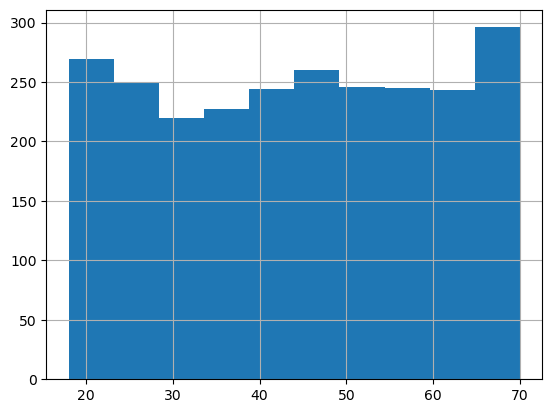

In [102]:
customers['Age'].describe()
customers['Age'].hist()


In [103]:
policies.head()

,Policy_id,Customer_id,PolicyType,PolicyStartDate,PolicyEndDate,PremiumAmount,PolicyStatus
0,P2017,C995,Vehicle,2025-05-18,2027-05-29,27587,Expired
1,P2016,C995,Travel,2025-05-19,2026-03-14,37397,Expired
2,P2013,C994,Home,2024-08-16,2025-03-26,7879,Active
3,P2015,C994,Life,2024-09-13,2027-04-08,35149,Expired
4,P2014,C994,Home,2024-12-16,2026-03-01,34238,Active


In [104]:
policies.groupby('PolicyType')['PremiumAmount'].mean()

PolicyType
Health     25901.829498
Home       26831.729703
Life       26227.414610
Travel     27205.629469
Vehicle    25944.462136
Name: PremiumAmount, dtype: float64

In [105]:
policies.dtypes

Policy_id          string[python]
Customer_id        string[python]
PolicyType         string[python]
PolicyStartDate    datetime64[ns]
PolicyEndDate      datetime64[ns]
PremiumAmount               int64
PolicyStatus       string[python]
dtype: object

In [106]:
policies['Customer_id'].value_counts().tail(10)

Customer_id
C280     1
C1340    1
C1444    1
C1107    1
C1779    1
C2440    1
C2149    1
C962     1
C686     1
C2014    1
Name: count, dtype: Int64

In [107]:
claims.head()

,Claim_id,Policy_id,Customer_id,DateofClaim,ClaimAmount,ClaimStatus,ClaimReason,SettlementDate
0,CL1066,P3624,C1820,2022-08-25,68019,Rejected,Damage,2022-09-06
1,CL1073,P3667,C1840,2022-10-11,32707,Rejected,Theft,2022-10-28
2,CL853,P2918,C1452,2022-11-15,22383,Pending,Loss,2023-01-22
3,CL119,P420,C207,2022-11-26,33386,Pending,Fire,2022-12-17
4,CL738,P2513,C1247,2022-11-28,53143,Pending,Flood,2023-01-11


In [108]:
cust_policy = pd.merge(customers, policies, on='Customer_id', how='left')
print(cust_policy)

     Customer_id               Name  Age Gender  \
0             C1        Farhan Tank   58   Male   
1             C1        Farhan Tank   58   Male   
2             C1        Farhan Tank   58   Male   
3             C2  Onkar Rajagopalan   35   Male   
4             C2  Onkar Rajagopalan   35   Male   
...          ...                ...  ...    ...   
4927       C2498       Kartik Uppal   45   Male   
4928       C2499          Rhea Wali   34  Other   
4929       C2500     Samarth Bhatti   44  Other   
4930       C2500     Samarth Bhatti   44  Other   
4931       C2500     Samarth Bhatti   44  Other   

                               Email           City        State IncomeLevel  \
0     gangulyelakshi@chakraborty.com     Chandrapur      Gujarat         Low   
1     gangulyelakshi@chakraborty.com     Chandrapur      Gujarat         Low   
2     gangulyelakshi@chakraborty.com     Chandrapur      Gujarat         Low   
3                 ritvik11@gmail.com          Delhi  West Bengal   

In [109]:
cust_policy.groupby('Customer_id')['PremiumAmount'].mean()

Customer_id
C1       30041.000000
C10      17785.666667
C100     38350.000000
C1000    32478.500000
C1001    16902.000000
             ...     
C995     32492.000000
C996     38242.000000
C997     10318.000000
C998     44980.000000
C999     46045.000000
Name: PremiumAmount, Length: 2500, dtype: float64

In [110]:
prem_sum = policies.groupby('Customer_id')['PremiumAmount'].sum()
claim_sum = claims.groupby('Customer_id')['ClaimAmount'].sum()
total = (prem_sum + claim_sum).sort_values(ascending=False).head(10)
print(total)

Customer_id
C1963    285078.0
C54      257471.0
C2271    241406.0
C466     241024.0
C1351    236767.0
C935     222665.0
C870     217707.0
C2061    217514.0
C2366    216675.0
C765     216649.0
dtype: float64


In [111]:
merged = claims.merge(policies[['Policy_id', 'PolicyType']], on='Policy_id')
merged.groupby('PolicyType').agg({'Claim_id':'count', 'ClaimAmount':'sum'})

,Claim_id,ClaimAmount
PolicyType,,
Health,131,6546494
Home,132,6820204
Life,117,5796466
Travel,113,5725744
Vehicle,121,5961997


In [112]:
claims.head()

,Claim_id,Policy_id,Customer_id,DateofClaim,ClaimAmount,ClaimStatus,ClaimReason,SettlementDate
0,CL1066,P3624,C1820,2022-08-25,68019,Rejected,Damage,2022-09-06
1,CL1073,P3667,C1840,2022-10-11,32707,Rejected,Theft,2022-10-28
2,CL853,P2918,C1452,2022-11-15,22383,Pending,Loss,2023-01-22
3,CL119,P420,C207,2022-11-26,33386,Pending,Fire,2022-12-17
4,CL738,P2513,C1247,2022-11-28,53143,Pending,Flood,2023-01-11


In [113]:
policies.head()

,Policy_id,Customer_id,PolicyType,PolicyStartDate,PolicyEndDate,PremiumAmount,PolicyStatus
0,P2017,C995,Vehicle,2025-05-18,2027-05-29,27587,Expired
1,P2016,C995,Travel,2025-05-19,2026-03-14,37397,Expired
2,P2013,C994,Home,2024-08-16,2025-03-26,7879,Active
3,P2015,C994,Life,2024-09-13,2027-04-08,35149,Expired
4,P2014,C994,Home,2024-12-16,2026-03-01,34238,Active


In [114]:
policy_payment= pd.merge(policies, payments, how='left', on='Customer_id')
paymentbypolicy= policy_payment.groupby('PolicyType')['PaymentAmount'].sum()
print(paymentbypolicy)

PolicyType
Health     25392673.0
Home       27572118.0
Life       27607922.0
Travel     24137782.0
Vehicle    28186948.0
Name: PaymentAmount, dtype: float64


In [115]:
claims_with_policy = claims.merge(policies[['Policy_id', 'PolicyType']], on='Policy_id')
total_claims = claims_with_policy.groupby('PolicyType')['Claim_id'].count()
approved_claims = claims_with_policy[claims_with_policy['ClaimStatus'] == 'Approved'].groupby('PolicyType')['Claim_id'].count()
settlement_ratio = (approved_claims / total_claims).fillna(0)
print(settlement_ratio)


PolicyType
Health     0.374046
Home       0.340909
Life       0.393162
Travel     0.318584
Vehicle    0.256198
Name: Claim_id, dtype: float64


In [116]:
risk_customers = claims.groupby('Customer_id').agg({'Claim_id':'count', 'ClaimAmount':'sum'})
high_risk_customers=risk_customers[(risk_customers['Claim_id'] > 2) & (risk_customers['ClaimAmount'] > 50000)]
print(high_risk_customers)

             Claim_id  ClaimAmount
Customer_id                       
C209                3        78551


In [117]:
claim_sum = claims.groupby('Customer_id')['ClaimAmount'].sum()
payment_sum = payments.groupby('Customer_id')['PaymentAmount'].sum()
pd.concat([claim_sum, payment_sum], axis=1).fillna(0)


,ClaimAmount,PaymentAmount
Customer_id,,
C1,61204.0,10872.0
C100,29433.0,38350.0
C1000,83532.0,31816.0
C1004,36407.0,42458.0
C1005,79444.0,49483.0
...,...,...
C991,0.0,74146.0
C992,0.0,27840.0
C994,0.0,36867.0


In [118]:
merged = claims.merge(payments[['Policy_id', 'PaymentMethod']], on='Policy_id')
pd.crosstab(merged['PaymentMethod'], merged['ClaimStatus'])


ClaimStatus,Approved,Pending,Rejected
PaymentMethod,,,
Credit Card,70,67,77
Debit Card,73,74,69
Net Banking,74,81,72
UPI,67,71,70


In [119]:
payment_with_claim= pd.merge(payments,claims,how='left',on='Customer_id')
pd.crosstab(payment_with_claim['PaymentMethod'],payment_with_claim['ClaimStatus'])

ClaimStatus,Approved,Pending,Rejected
PaymentMethod,,,
Credit Card,148,126,140
Debit Card,163,143,148
Net Banking,129,151,147
UPI,133,141,148


In [120]:
claim_sum = claims.groupby('Customer_id')['ClaimAmount'].sum()
payment_sum = payments.groupby('Customer_id')['PaymentAmount'].sum()
pd.concat([claim_sum, payment_sum], axis=1).fillna(0)

,ClaimAmount,PaymentAmount
Customer_id,,
C1,61204.0,10872.0
C100,29433.0,38350.0
C1000,83532.0,31816.0
C1004,36407.0,42458.0
C1005,79444.0,49483.0
...,...,...
C991,0.0,74146.0
C992,0.0,27840.0
C994,0.0,36867.0


In [121]:
claim_payment= pd.merge(payments, claims, how='left', on='Customer_id')
amounts= claim_payment.groupby('Customer_id')[['ClaimAmount','PaymentAmount']].sum()
print(amounts)

             ClaimAmount  PaymentAmount
Customer_id                            
C1               61204.0          10872
C100             58866.0          38350
C1000           167064.0          31816
C1002                0.0           6150
C1004           145628.0          42458
...                  ...            ...
C991                 0.0          74146
C992                 0.0          27840
C994                 0.0          36867
C996                 0.0          38242
C997                 0.0           6878

[1740 rows x 2 columns]


In [122]:
customers['AgeGroup'] = pd.cut(customers['Age'], bins=[0,30,50,100], labels=['<30','30-50','>50'])
merged = claims.merge(customers[['Customer_id','AgeGroup']], on='Customer_id')
result = merged.groupby('AgeGroup')['ClaimAmount'].sum()
print(result)


AgeGroup
<30       6685282
30-50    11731111
>50      12434512
Name: ClaimAmount, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13032\2027349011.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = merged.groupby('AgeGroup')['ClaimAmount'].sum()


In [123]:
claims['Month'] = claims['DateofClaim'].dt.to_period('M')
payments['Month'] = payments['PaymentDate'].dt.to_period('M')

claims_monthly = claims.groupby('Month')['ClaimAmount'].sum()
payments_monthly = payments.groupby('Month')['PaymentAmount'].sum()

trend = pd.concat([claims_monthly, payments_monthly], axis=1).fillna(0)
trend.columns = ['TotalClaimAmount','TotalPaymentAmount']
print(trend)


         TotalClaimAmount  TotalPaymentAmount
Month                                        
2022-08           68019.0               21512
2022-10           32707.0              157484
2022-11          108912.0              127260
2022-12           75139.0              220961
2023-02          206615.0              332055
2023-03          164900.0              366375
2023-04          343634.0              482136
2023-05          315287.0              701073
2023-06          147119.0              568761
2023-07          309693.0              613379
2023-08          424563.0              890055
2023-09          199928.0              979214
2023-10          399822.0              871379
2023-11          605532.0             1227126
2023-12          691669.0             1605364
2024-01         1137585.0             1641755
2024-02          647859.0             1122969
2024-03          396125.0             1783293
2024-04         1259945.0             1622787
2024-05         1275543.0         

In [124]:
import matplotlib.pyplot as plt

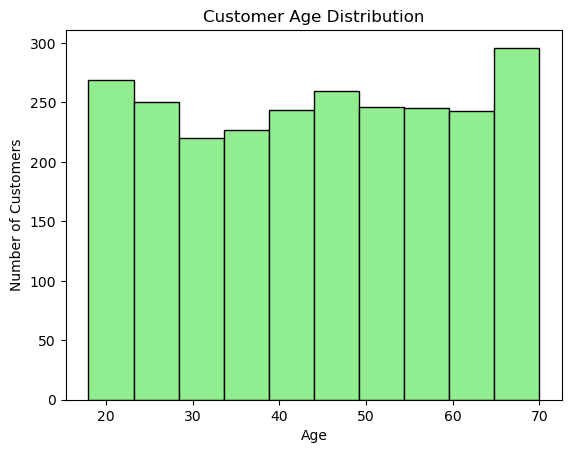

In [129]:
# Customer Age Distribution

plt.hist(customers['Age'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


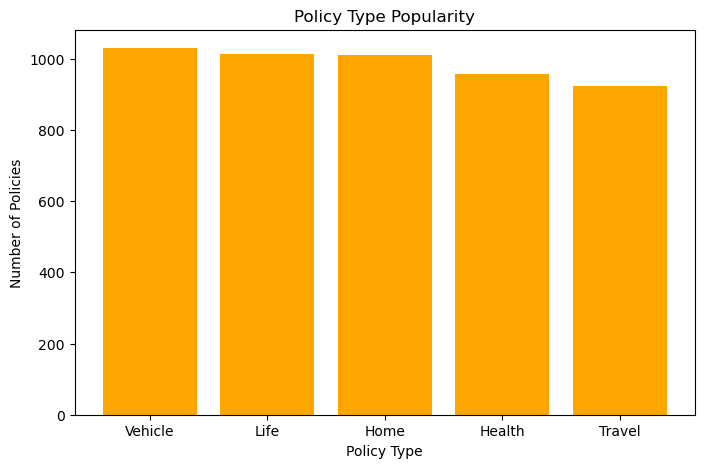

In [131]:
# Most popular policy types among customers

policy_counts = policies['PolicyType'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(policy_counts.index, policy_counts.values, color='orange')
plt.title('Policy Type Popularity')
plt.xlabel('Policy Type')
plt.ylabel('Number of Policies')
plt.show()
